In [148]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [149]:
df1 = pd.read_csv('rose.csv',parse_dates=True,index_col='YearMonth')
df1.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [150]:
df1.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


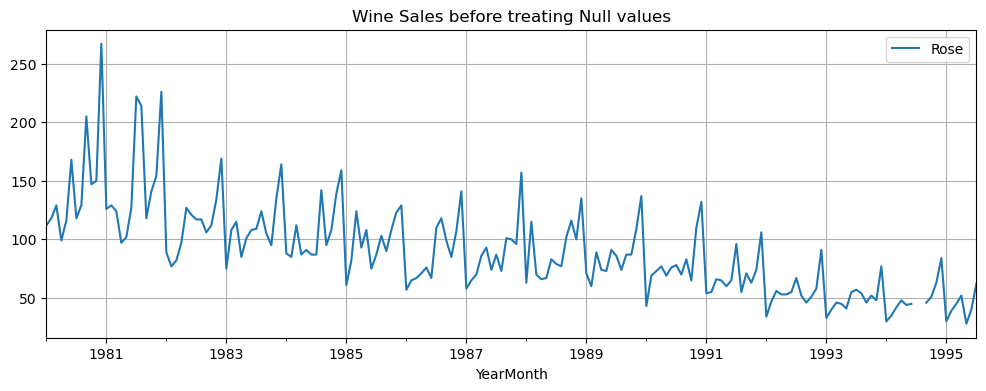

In [151]:
rcParams['figure.figsize'] = 12,4
df1.plot(grid=True,title = "Wine Sales before treating Null values");

In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [153]:
nul_data = pd.isnull(df1['Rose'])
df1[nul_data]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


In [154]:

df1['Sales_Before_After_Mean']=df1['Rose']

In [155]:
df1['Year']=df1.index.year
df1['Month']=df1.index.month
df1.head()

,Rose,Sales_Before_After_Mean,Year,Month
YearMonth,,,,
1980-01-01,112.0,112.0,1980,1
1980-02-01,118.0,118.0,1980,2
1980-03-01,129.0,129.0,1980,3
1980-04-01,99.0,99.0,1980,4
1980-05-01,116.0,116.0,1980,5


In [156]:
np.mean(df1[df1.Month==7]['1993-07-01':'1995-07-01']['Rose'])

59.5

In [157]:
df1.loc['1994-07-01', 'Sales_Before_After_Mean']=np.mean(
    df1[df1.Month==7]['1993-07-01':'1995-07-01']['Rose'])
df1.loc['1994-08-01', 'Sales_Before_After_Mean']=np.mean(
    df1[df1.Month==8]['1993-08-01':'1995-08-01']['Rose'])

df1[df1['Sales_Before_After_Mean'].isna()]

,Rose,Sales_Before_After_Mean,Year,Month
YearMonth,,,,


In [158]:
df1.loc['1994-07-01':'1994-08-01']

,Rose,Sales_Before_After_Mean,Year,Month
YearMonth,,,,
1994-07-01,NaN,59.5,1994,7
1994-08-01,NaN,54.0,1994,8


In [159]:
df1.drop(['Rose'],inplace=True,axis=1)
df1.rename(columns={'Sales_Before_After_Mean': 'Rose'}, inplace=True)
df1.head()

,Rose,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


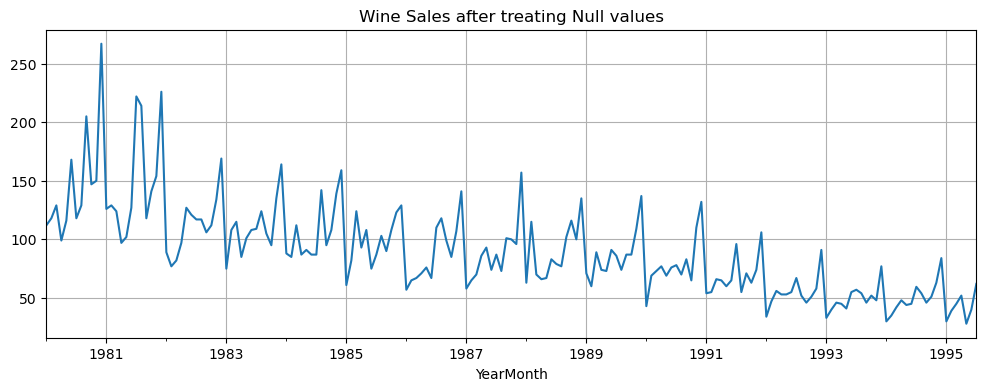

In [160]:

df1['Rose'].plot(grid=True,title = "Wine Sales after treating Null values");

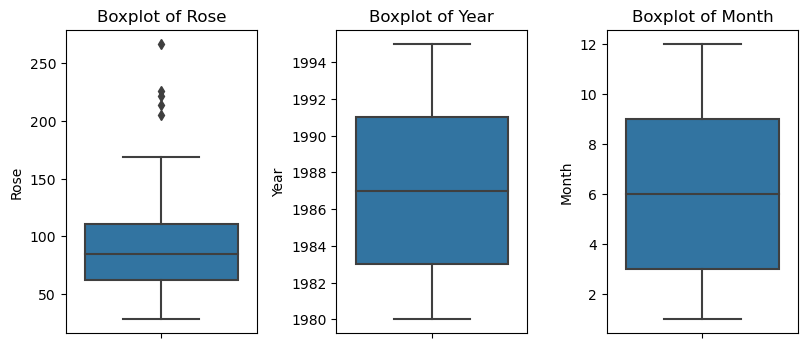

In [15]:
# boxplot
import seaborn as sns
dfbox=df1
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

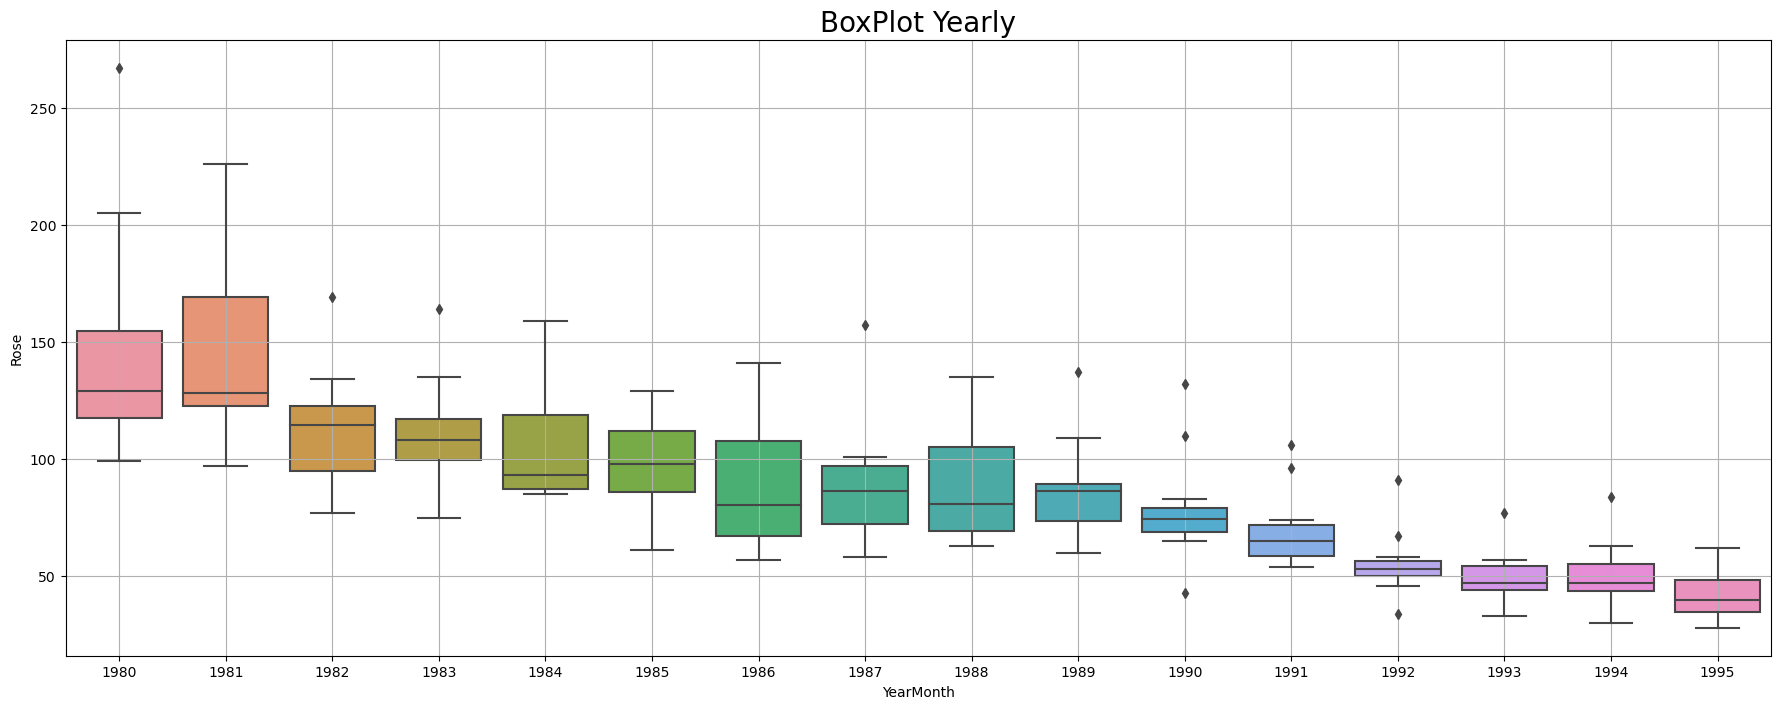

In [17]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.year,y = df1['Rose'],ax=ax)

plt.title("BoxPlot Yearly",fontsize = 20)
plt.grid();

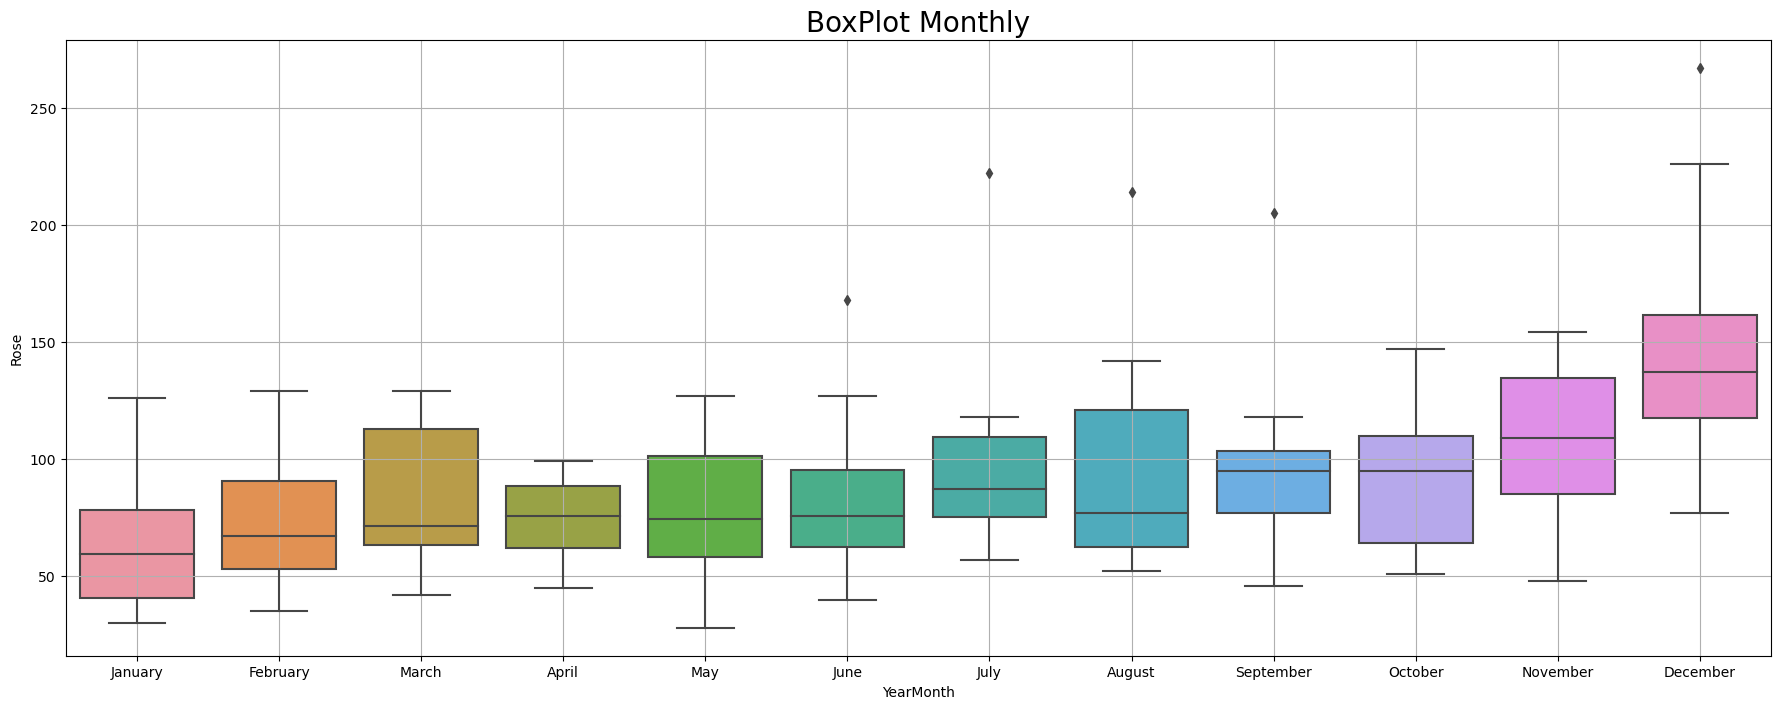

In [19]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df1.index.month_name(),y = df1['Rose'],ax=ax)
plt.title("BoxPlot Monthly",fontsize = 20)
plt.grid();

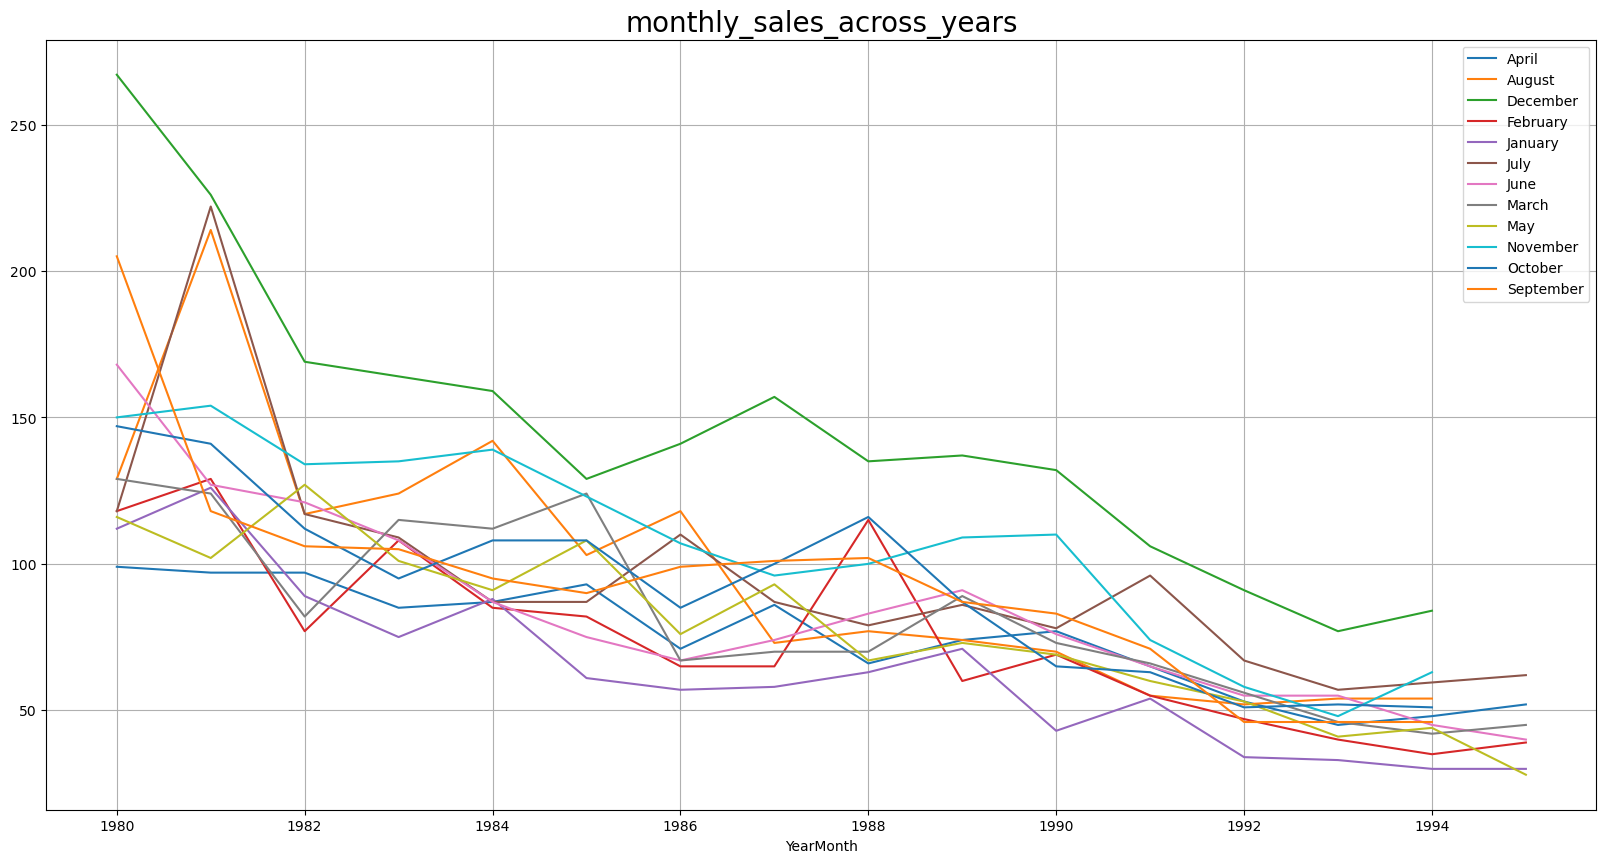

In [20]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Rose', columns = df1.index.month_name(), index = df1.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.title("monthly_sales_across_years",fontsize = 20)
plt.legend(loc='best');

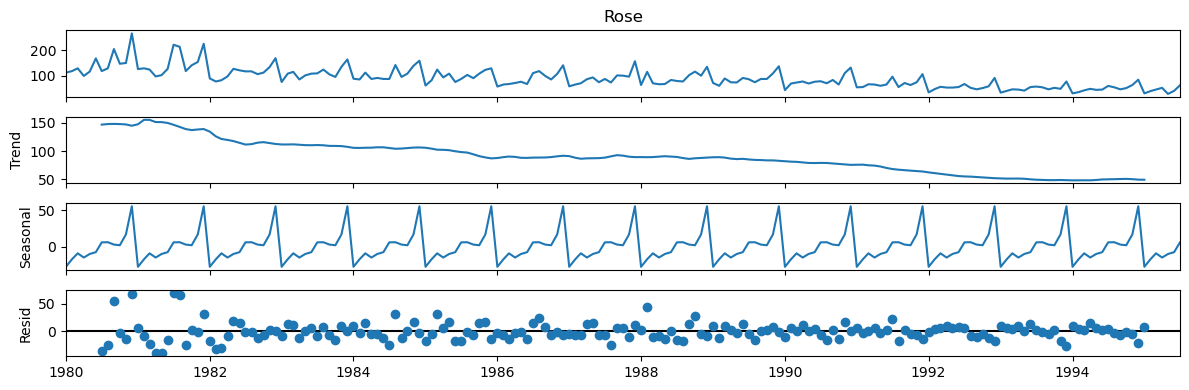

In [21]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df1['Rose'], model = 'additive',period=12)
df1_add_decompose.plot()
plt.show()

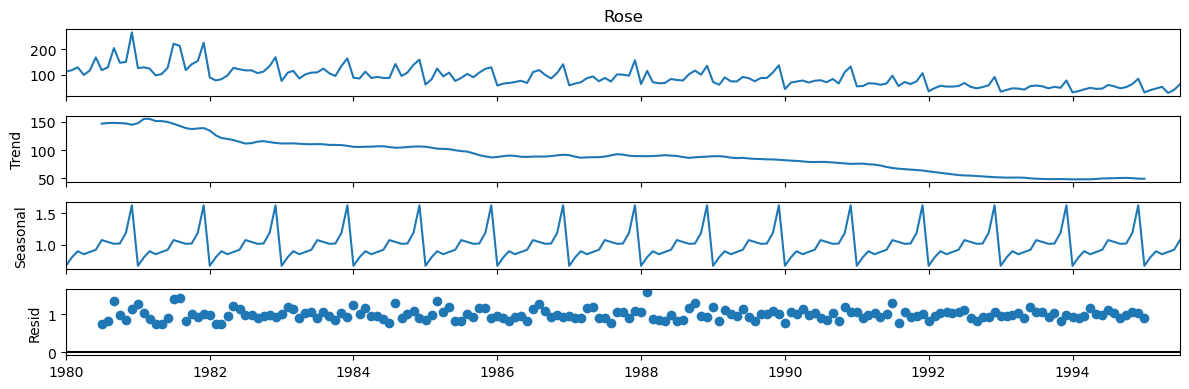

In [22]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1['Rose'], model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [23]:
train    =   df1[0:int(len(df1['Rose'])*0.7)] 
test     =   df1[int(len(df1['Rose'])*0.7):]

In [24]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (130, 3)
test dataset:  (57, 3) 

Rows of dataset: 
First few rows of Training Data 
              Rose  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3
1980-04-01   99.0  1980      4
1980-05-01  116.0  1980      5 

Last few rows of Training Data 
             Rose  Year  Month
YearMonth                    
1990-06-01  76.0  1990      6
1990-07-01  78.0  1990      7
1990-08-01  70.0  1990      8
1990-09-01  83.0  1990      9
1990-10-01  65.0  1990     10 

First few rows of Test Data 
              Rose  Year  Month
YearMonth                     
1990-11-01  110.0  1990     11
1990-12-01  132.0  1990     12
1991-01-01   54.0  1991      1
1991-02-01   55.0  1991      2
1991-03-01   66.0  1991      3 

Last few rows of Test Data 
             Rose  Year  Month
YearMonth                    
1995-03-01  45.0  1995      3
1995-04-01  52.0  1995      4
1995-05-01  28.0 

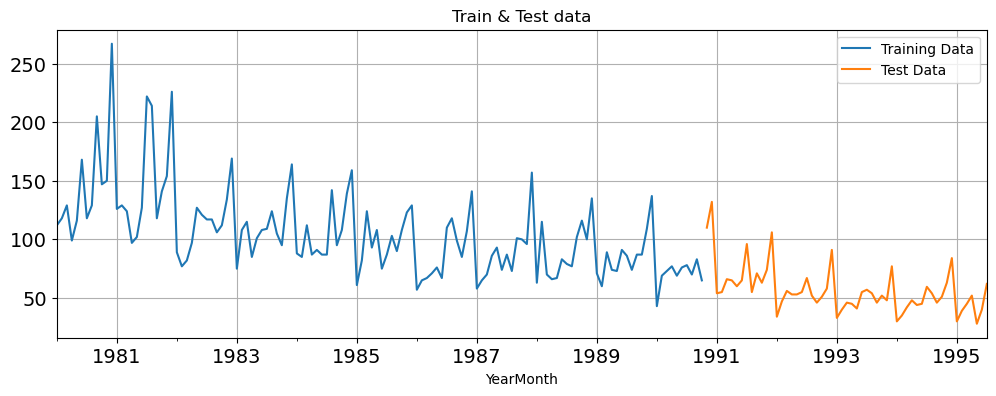

In [26]:
train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title("Train & Test data")
plt.show()

In [27]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312]


In [28]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

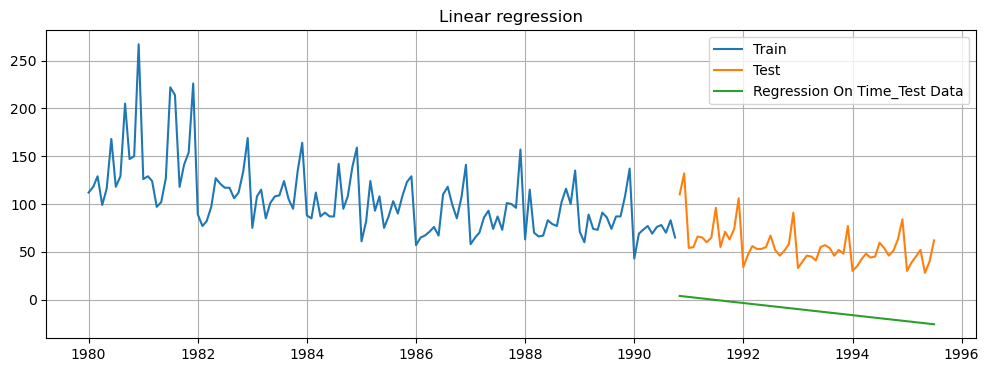

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title("Linear regression")
plt.legend(loc='best')
plt.grid();

In [30]:
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 69.749 


In [31]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,69.748996


In [32]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,Year,Month,mean_forecast
YearMonth,,,,
1990-11-01,110.0,1990,11,104.692308
1990-12-01,132.0,1990,12,104.692308
1991-01-01,54.0,1991,1,104.692308
1991-02-01,55.0,1991,2,104.692308
1991-03-01,66.0,1991,3,104.692308


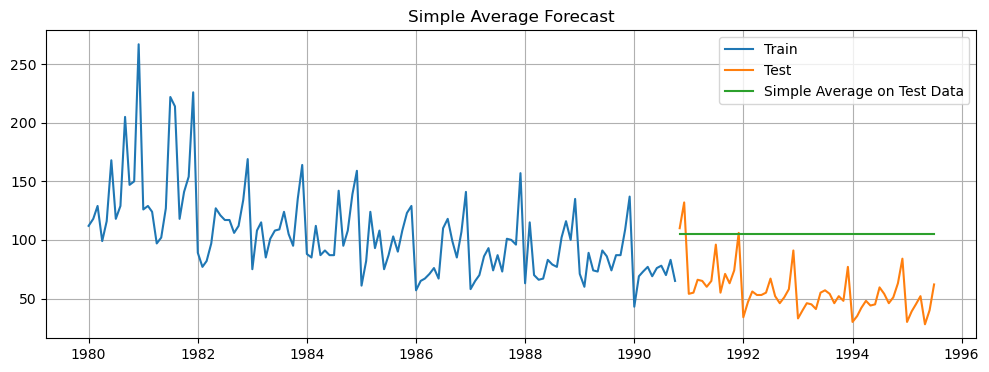

In [33]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [34]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.010


In [35]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,69.748996
SimpleAverageModel,52.009633


In [36]:

MovingAverage = df1.copy()
MovingAverage.head()

,Rose,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


In [37]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.tail()

,Rose,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1995-03-01,45.0,1995,3,42.0,49.50,52.000000,52.388889
1995-04-01,52.0,1995,4,48.5,41.50,52.166667,51.555556
1995-05-01,28.0,1995,5,40.0,41.00,46.333333,48.666667
1995-06-01,40.0,1995,6,34.0,41.25,39.000000,48.000000
1995-07-01,62.0,1995,7,51.0,45.50,44.333333,49.222222


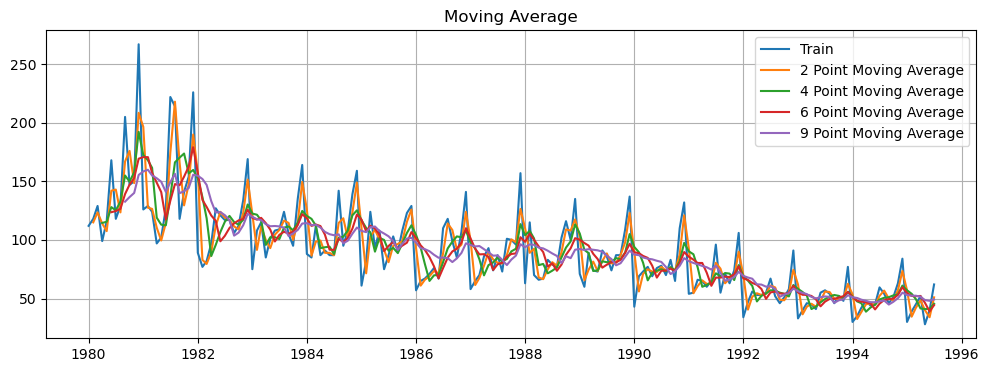

In [38]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title('Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [39]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

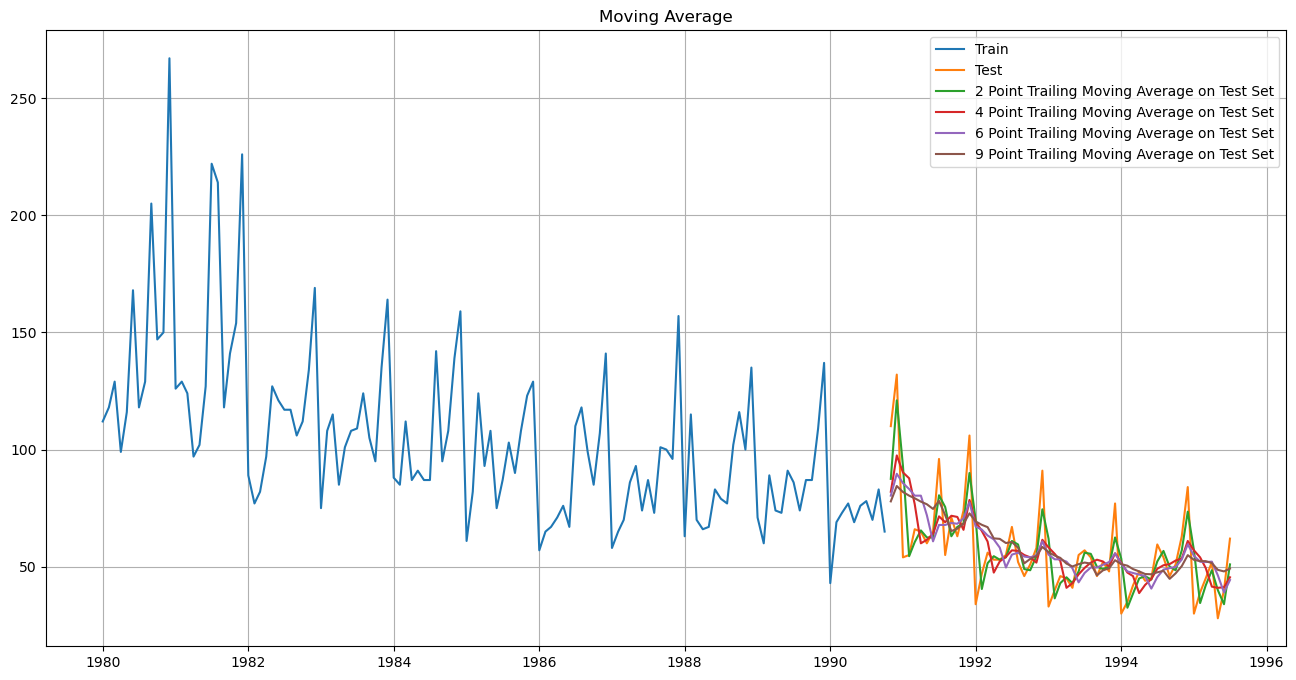

In [40]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title('Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [41]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.857
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.417
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.855
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.402


In [42]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,69.748996
SimpleAverageModel,52.009633
2pointTrailingMovingAverage,11.857432
4pointTrailingMovingAverage,15.416939
6pointTrailingMovingAverage,15.854979
9pointTrailingMovingAverage,16.402395


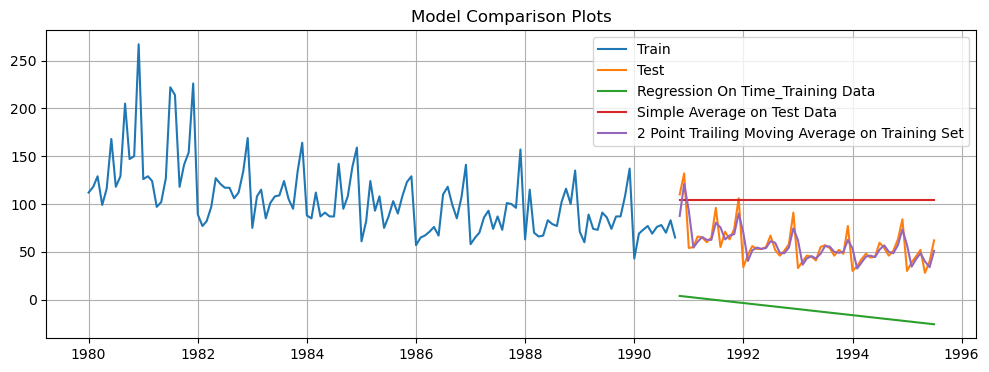

In [43]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')


plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [44]:
df1.drop(['Year','Month'],inplace=True, axis=1)

In [45]:
train    =   df1[0:int(len(df1)*0.7)] 
test     =   df1[int(len(df1)*0.7):]

In [46]:
train.head

<bound method NDFrame.head of              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1990-06-01   76.0
1990-07-01   78.0
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0

[130 rows x 1 columns]>

In [47]:
# create class
model_SES = SimpleExpSmoothing(train['Rose'],initialization_method='estimated')
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

model_SES_autofit.params


{'smoothing_level': 0.1027210637690678,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.26261326012983,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [48]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
##SES_predict = np.exp(SES_predict)
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test,SES_predict.values)[0])

SES RMSE: 29.82736963551673
SES RMSE (calculated using statsmodels): 29.82736963551673


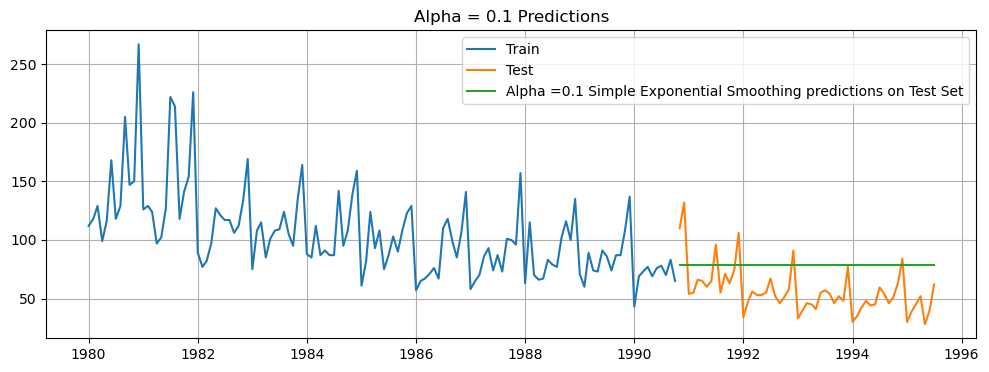

In [49]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_predict, label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.1 Predictions');

In [50]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.1,SES'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,69.748996
SimpleAverageModel,52.009633
2pointTrailingMovingAverage,11.857432
4pointTrailingMovingAverage,15.416939
6pointTrailingMovingAverage,15.854979
9pointTrailingMovingAverage,16.402395
"Alpha=0.1,SES",29.827370


In [141]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
model_DES.params


==Holt model Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 1.1142151039754693e-10,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 139.3541894587564,
 'initial_trend': -0.529189091674724,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))

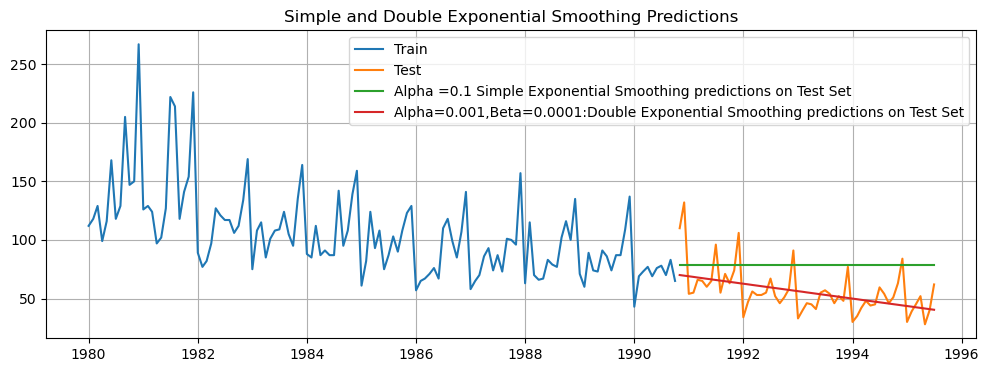

In [57]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')


plt.plot(SES_predict, label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.001,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [54]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 17.467105511059792


In [55]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.001,Beta=0.0001:DES'])
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,69.748996
SimpleAverageModel,52.009633
2pointTrailingMovingAverage,11.857432
4pointTrailingMovingAverage,15.416939
6pointTrailingMovingAverage,15.854979
9pointTrailingMovingAverage,16.402395
"Alpha=0.1,SES",29.827370
"Alpha=0.001,Beta=0.0001:DES",17.467106


In [142]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()


print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
model_TES.params


==Holt Winters model Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.08821436937988711,
 'smoothing_trend': 1.800307905077045e-05,
 'smoothing_seasonal': 0.0003555282543494388,
 'damping_trend': nan,
 'initial_level': 146.89163094636658,
 'initial_trend': -0.5560607891056817,
 'initial_seasons': array([-31.04964235, -18.73445697, -10.76315366, -21.43688134,
        -12.5757113 ,  -6.95772026,   2.76047953,   8.92527792,
          4.8839166 ,   2.94720422,  19.88703135,  63.66923412]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [61]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))

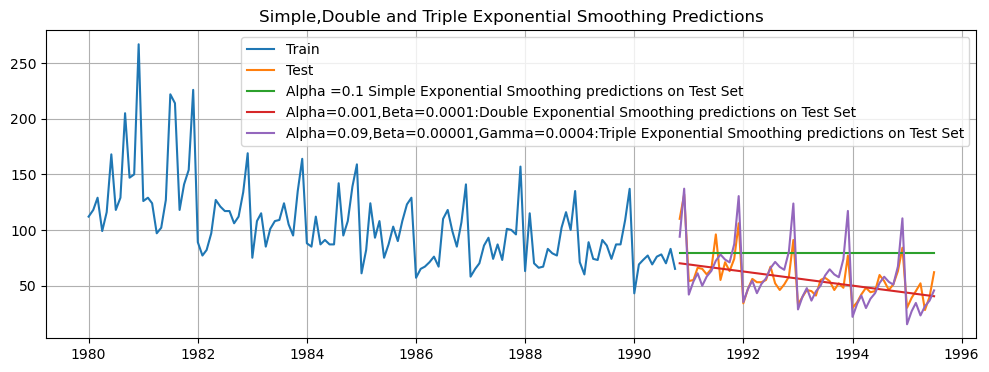

In [62]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.001,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.09,Beta=0.00001,Gamma=0.0004:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [63]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 13.848022378352798


In [64]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.09,Beta=0.00001,Gamma=0.0004:TES_ADD'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,69.748996
SimpleAverageModel,52.009633
2pointTrailingMovingAverage,11.857432
4pointTrailingMovingAverage,15.416939
6pointTrailingMovingAverage,15.854979
9pointTrailingMovingAverage,16.402395
"Alpha=0.1,SES",29.827370
"Alpha=0.001,Beta=0.0001:DES",17.467106
"Alpha=0.09,Beta=0.00001,Gamma=0.0004:TES_ADD",13.848022


In [143]:
# Initializing the Triple Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
model_TES_am.params


==Holt Winters model Exponential Smoothing Estimated Parameters ==



{'smoothing_level': 0.10169520380955438,
 'smoothing_trend': 0.0007058642829212204,
 'smoothing_seasonal': 1.2230189753146669e-05,
 'damping_trend': nan,
 'initial_level': 127.00110122061433,
 'initial_trend': -0.5130818887786344,
 'initial_seasons': array([0.86329436, 0.9758005 , 1.06696094, 0.93565741, 1.05039692,
        1.13162774, 1.24587724, 1.33247998, 1.24729237, 1.22701271,
        1.41107894, 1.94589043]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [70]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))

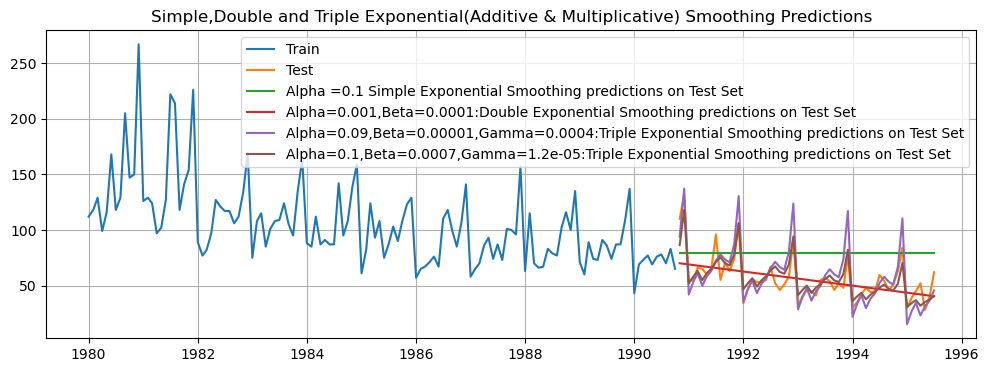

In [73]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.001,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.09,Beta=0.00001,Gamma=0.0004:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.1,Beta=0.0007,Gamma=1.2e-05:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential(Additive & Multiplicative) Smoothing Predictions');

In [74]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 9.419221983932971


In [75]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.1,Beta=0.0007,Gamma=1.2e-05:TES_Mul'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
RegressionOnTime,69.748996
SimpleAverageModel,52.009633
2pointTrailingMovingAverage,11.857432
4pointTrailingMovingAverage,15.416939
6pointTrailingMovingAverage,15.854979
9pointTrailingMovingAverage,16.402395
"Alpha=0.1,SES",29.827370
"Alpha=0.001,Beta=0.0001:DES",17.467106
"Alpha=0.09,Beta=0.00001,Gamma=0.0004:TES_ADD",13.848022
"Alpha=0.1,Beta=0.0007,Gamma=1.2e-05:TES_Mul",9.419222


The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

- H0
 : The Time Series has a unit root and is thus non-stationary.
- H1
 : The Time Series does not have a unit root and is thus stationary.
 
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α
 value.
 
We see that at 5% significant level the Time Series is non-stationary.

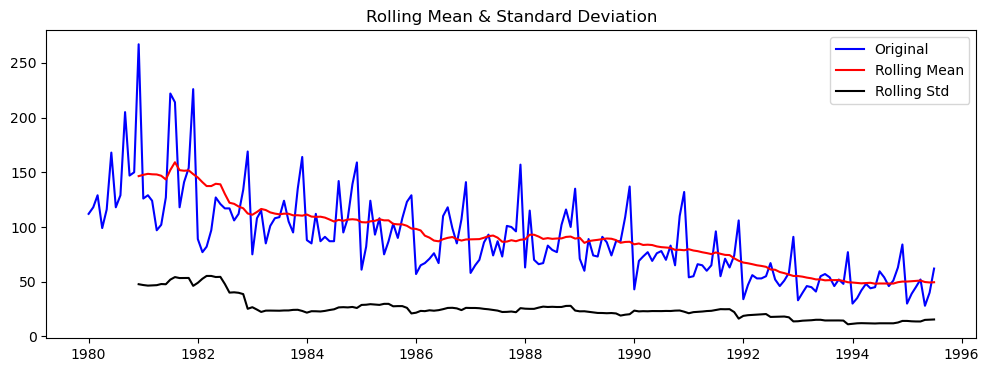

Results of Dickey-Fuller Test:
Test Statistic                  -1.892338
p-value                          0.335674
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [76]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=12).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df1)

the p-value 0.33 is very large, and not smaller than 0.05 and thus is not a stationary series.

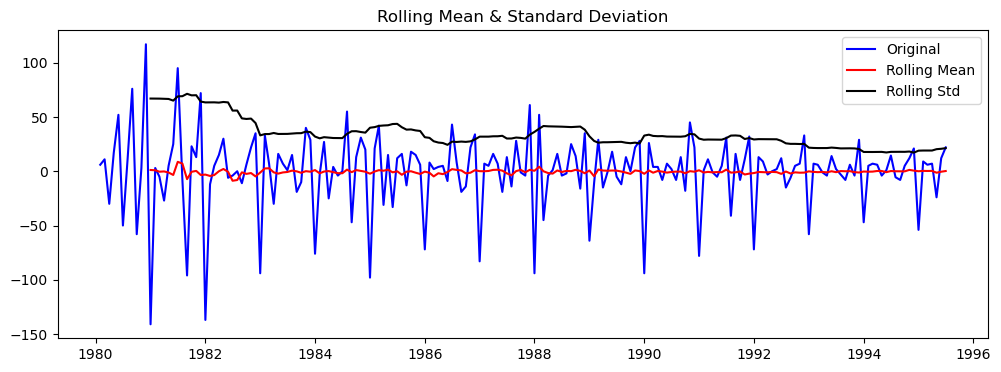

Results of Dickey-Fuller Test:
Test Statistic                -8.032729e+00
p-value                        1.938803e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [77]:
test_stationarity(df1.diff().dropna())

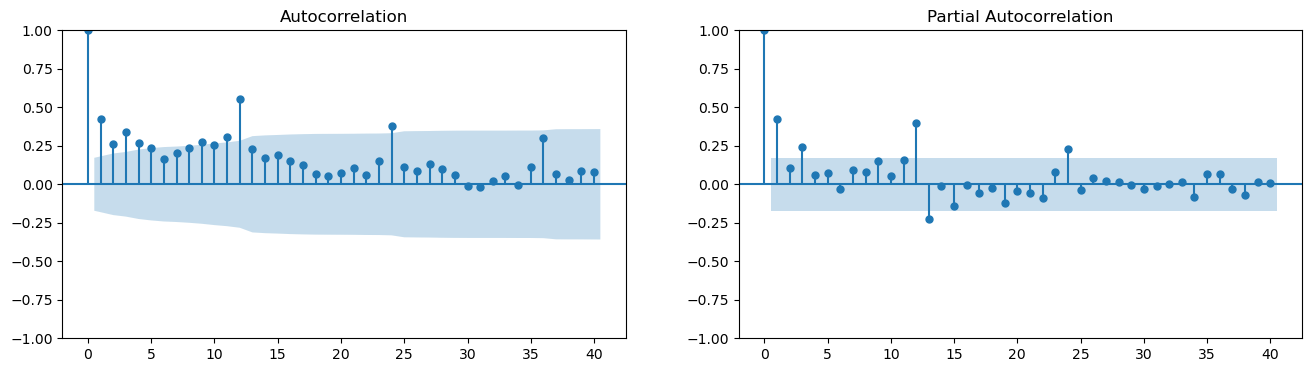

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(train, lags=40, ax=axes[0], alpha=0.05)  # ACF plot
plot_pacf(train, lags=40, ax=axes[1], alpha=0.05)  # PACF plot
plt.show()


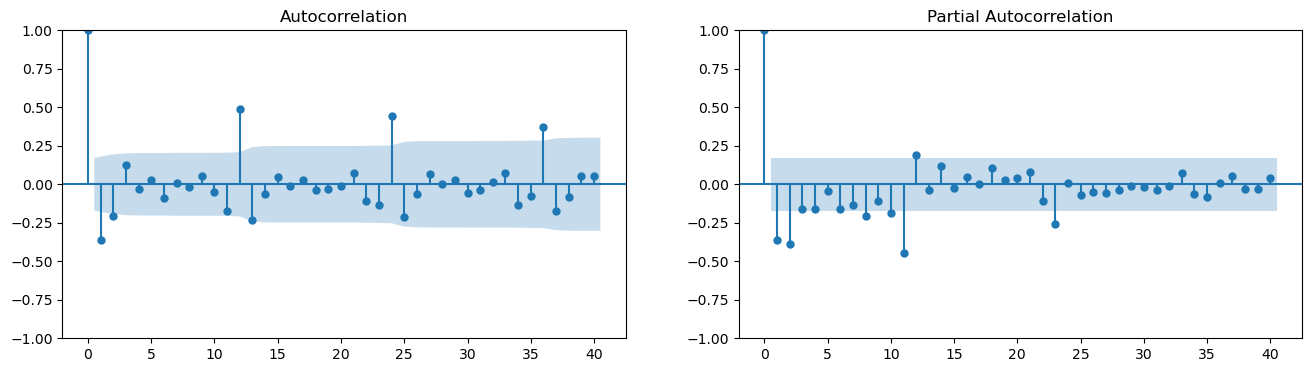

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(train.diff().dropna(), lags=40, ax=axes[0], alpha=0.05)  # ACF plot
plot_pacf(train.diff().dropna(), lags=40, ax=axes[1], alpha=0.05)  # PACF plot
plt.show()

In [86]:
from statsmodels.tsa.arima.model import ARIMA
manual_ARIMA = ARIMA(train, order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -625.736
Date:                Sun, 26 May 2024   AIC                           1261.472
Time:                        12:49:56   BIC                           1275.771
Sample:                    01-01-1980   HQIC                          1267.282
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4622      0.483     -0.957      0.338      -1.409       0.484
ar.L2         -0.0039      0.169     -0.023      0.981      -0.335       0.327
ma.L1         -0.2523      0.473     -0.534      0.5

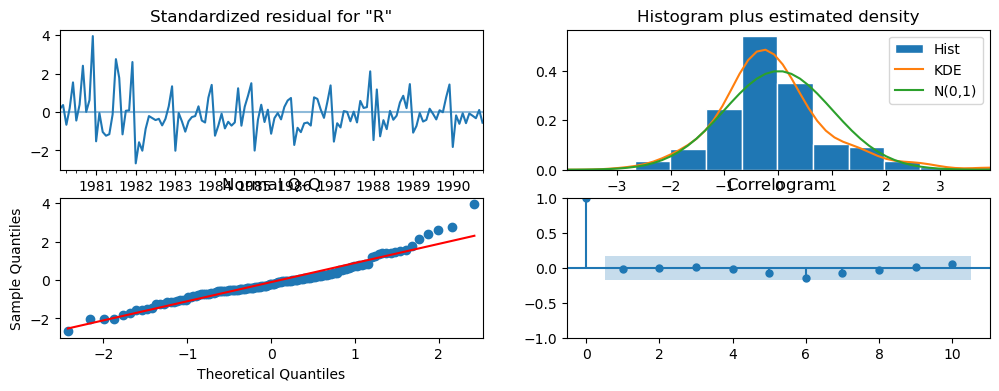

In [87]:

results_manual_ARIMA.plot_diagnostics();

In [88]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test,predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 30.086214649757334


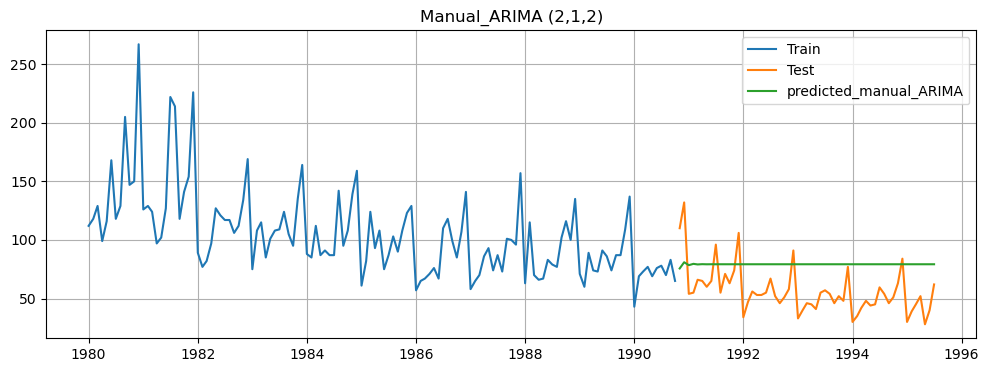

In [89]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_manual_ARIMA, label='predicted_manual_ARIMA')


plt.legend(loc='best')
plt.grid()
plt.title('Manual_ARIMA (2,1,2)');

In [90]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,predicted_manual_ARIMA,squared=False)]}
                           ,index=['Manual_ARIMA (2,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,69.748996
SimpleAverageModel,52.009633
2pointTrailingMovingAverage,11.857432
4pointTrailingMovingAverage,15.416939
6pointTrailingMovingAverage,15.854979
9pointTrailingMovingAverage,16.402395
"Alpha=0.1,SES",29.827370
"Alpha=0.001,Beta=0.0001:DES",17.467106
"Alpha=0.09,Beta=0.00001,Gamma=0.0004:TES_ADD",13.848022
"Alpha=0.1,Beta=0.0007,Gamma=1.2e-05:TES_Mul",9.419222


In [91]:

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC


,param,seasonal,AIC


In [94]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train.values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -529.565
Date:                            Sun, 26 May 2024   AIC                           1077.129
Time:                                    12:51:07   BIC                           1101.989
Sample:                                         0   HQIC                          1087.222
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5244      0.236     -2.219      0.026      -0.988      -0.061
ar.L2         -0.0774      0.102   

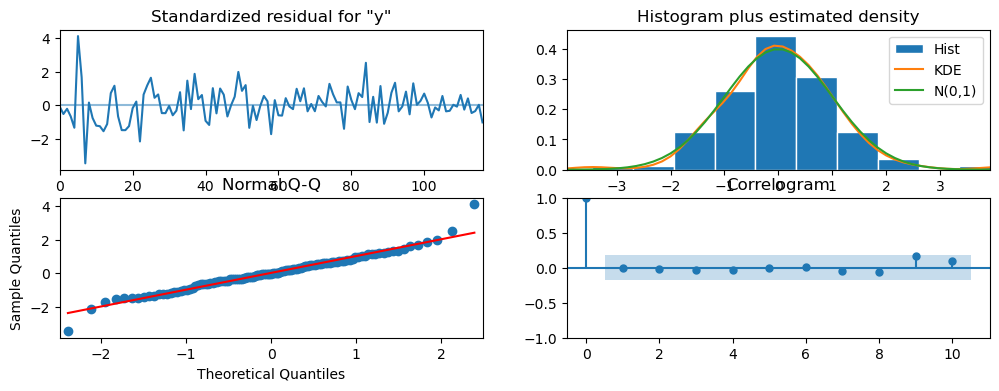

In [95]:
results_manual_SARIMA.plot_diagnostics();

In [96]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test,predicted_manual_SARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 13.412013760761567


In [97]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,predicted_manual_SARIMA,squared=False)]}
                           ,index=['Manual SARIMAX(2, 1, 2)x(2, 1, 2, 12)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,69.748996
SimpleAverageModel,52.009633
2pointTrailingMovingAverage,11.857432
4pointTrailingMovingAverage,15.416939
6pointTrailingMovingAverage,15.854979
9pointTrailingMovingAverage,16.402395
"Alpha=0.1,SES",29.827370
"Alpha=0.001,Beta=0.0001:DES",17.467106
"Alpha=0.09,Beta=0.00001,Gamma=0.0004:TES_ADD",13.848022
"Alpha=0.1,Beta=0.0007,Gamma=1.2e-05:TES_Mul",9.419222


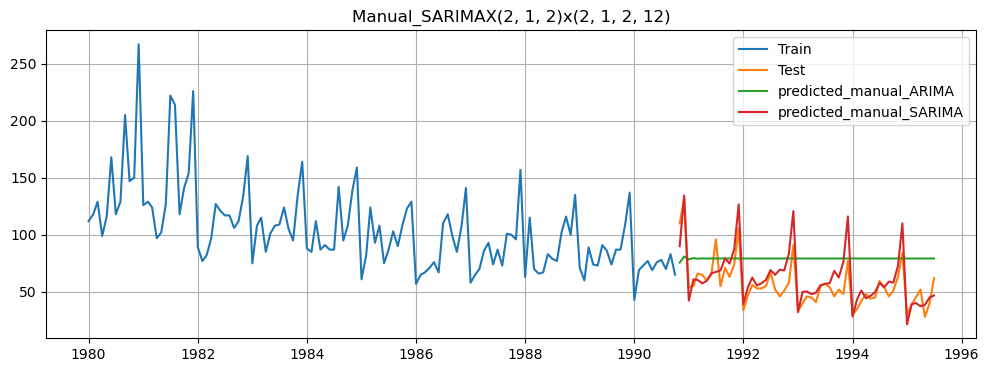

In [98]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
forecast_index = test.index
plt.plot(predicted_manual_ARIMA, label='predicted_manual_ARIMA')
plt.plot(forecast_index,predicted_manual_SARIMA, label='predicted_manual_SARIMA')

plt.legend(loc='best')
plt.grid()
plt.title('Manual_SARIMAX(2, 1, 2)x(2, 1, 2, 12)');

In [99]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [100]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [101]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train.values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1313.1758613526422
ARIMA(0, 1, 1) - AIC:1261.3274438405854
ARIMA(0, 1, 2) - AIC:1259.2477803151237
ARIMA(0, 1, 3) - AIC:1260.1328188315792
ARIMA(1, 1, 0) - AIC:1297.0772943848701
ARIMA(1, 1, 1) - AIC:1260.0367627035753
ARIMA(1, 1, 2) - AIC:1259.4732049501201
ARIMA(1, 1, 3) - AIC:1261.4721912366294
ARIMA(2, 1, 0) - AIC:1278.1352807484313
ARIMA(2, 1, 1) - AIC:1261.0140762917044
ARIMA(2, 1, 2) - AIC:1261.4720006569075
ARIMA(2, 1, 3) - AIC:1258.119777790822
ARIMA(3, 1, 0) - AIC:1276.8427173909408
ARIMA(3, 1, 1) - AIC:1261.9690977609368
ARIMA(3, 1, 2) - AIC:1263.3317671044238
ARIMA(3, 1, 3) - AIC:1258.4372825851135


In [102]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
11,"(2, 1, 3)",1258.119778
15,"(3, 1, 3)",1258.437283
2,"(0, 1, 2)",1259.247780
6,"(1, 1, 2)",1259.473205
5,"(1, 1, 1)",1260.036763
3,"(0, 1, 3)",1260.132819
9,"(2, 1, 1)",1261.014076
1,"(0, 1, 1)",1261.327444
10,"(2, 1, 2)",1261.472001
7,"(1, 1, 3)",1261.472191


In [103]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  130
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -623.060
Date:                Sun, 26 May 2024   AIC                           1258.120
Time:                        12:52:18   BIC                           1275.279
Sample:                    01-01-1980   HQIC                          1265.092
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6986      0.059    -28.710      0.000      -1.815      -1.583
ar.L2         -0.8614      0.058    -14.864      0.000      -0.975      -0.748
ma.L1          0.9631      0.099      9.756      0.0

In [104]:
# Prediction rsme
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test, predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

29.18483465204745


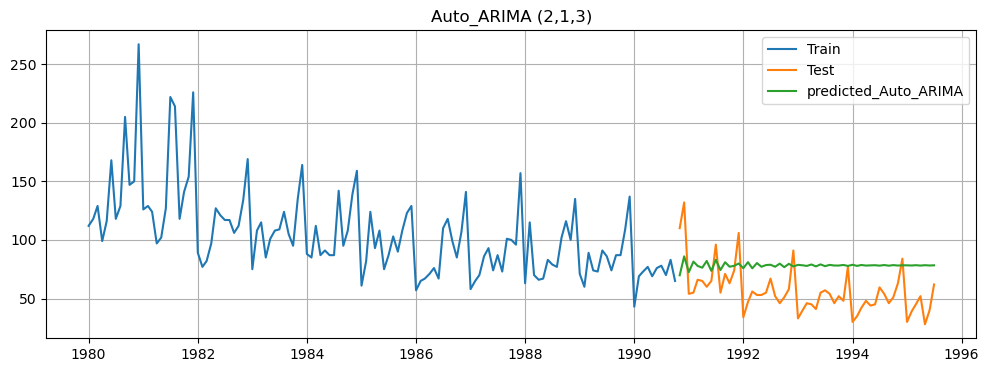

In [105]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
forecast_index = test.index
plt.plot(predicted_auto_ARIMA, label='predicted_Auto_ARIMA')


plt.legend(loc='best')
plt.grid()
plt.title('Auto_ARIMA (2,1,3)');

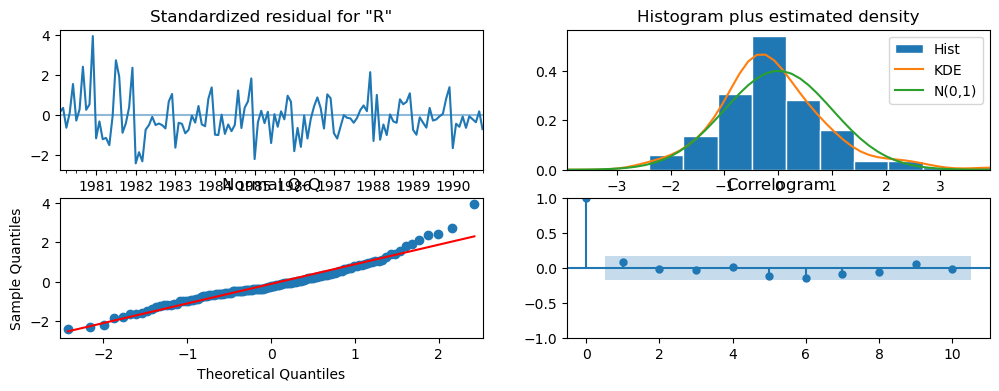

In [144]:
results_auto_ARIMA.plot_diagnostics()
plt.show()

In [106]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,predicted_auto_ARIMA,squared=False)]}
                           ,index=['Auto_ARIMA (2,1,3)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,69.748996
SimpleAverageModel,52.009633
2pointTrailingMovingAverage,11.857432
4pointTrailingMovingAverage,15.416939
6pointTrailingMovingAverage,15.854979
9pointTrailingMovingAverage,16.402395
"Alpha=0.1,SES",29.827370
"Alpha=0.001,Beta=0.0001:DES",17.467106
"Alpha=0.09,Beta=0.00001,Gamma=0.0004:TES_ADD",13.848022
"Alpha=0.1,Beta=0.0007,Gamma=1.2e-05:TES_Mul",9.419222


In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [115]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train.values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1152.8944112896427
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:946.5255706383725
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:827.4161882798954
SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:2179.7035537372503
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:963.3074810361367
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:955.90241535815
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:829.2186210967366
SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:3281.832527915418
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:839.1329917213063
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:834.4921533619314
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:824.3830509690057
SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:3705.0465719799477
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:732.7500100283158
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:729.4710917114238
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:730.7834344237006
SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:2511.4861458453756
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1096.7564633976488
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:899.1279003224759
SARIMA(0, 1, 1)x(0, 1, 2,

SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:777.2798270113633
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:769.0961329445562
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:770.8360214933653
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:18.0
SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:679.078782148233
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:672.9141560997357
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:674.1678248706669
SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:3219.673215187128
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1082.4796249533458
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:888.4121927290493
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:768.8907852202514
SARIMA(2, 1, 2)x(0, 1, 3, 12) - AIC:2432.1740935091093
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:908.750787440162
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:898.9034751485714
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:772.7278696240788
SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:3096.8155437087985
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:779.1656800774686
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:768.7498399170386
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:763.

In [116]:
SARIMA_AIC.sort_values(by=['AIC']).head()


,param,seasonal,AIC
155,"(2, 1, 1)","(2, 1, 3, 12)",18.000000
107,"(1, 1, 2)","(2, 1, 3, 12)",18.000000
123,"(1, 1, 3)","(2, 1, 3, 12)",420.741527
221,"(3, 1, 1)","(3, 1, 1, 12)",666.482966
253,"(3, 1, 3)","(3, 1, 1, 12)",667.062111


In [123]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train.values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -324.241
Date:                            Sun, 26 May 2024   AIC                            666.483
Time:                                    13:20:35   BIC                            687.693
Sample:                                         0   HQIC                           674.974
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0305      0.153      0.199      0.842      -0.270       0.331
ar.L2         -0.0437      0.143   

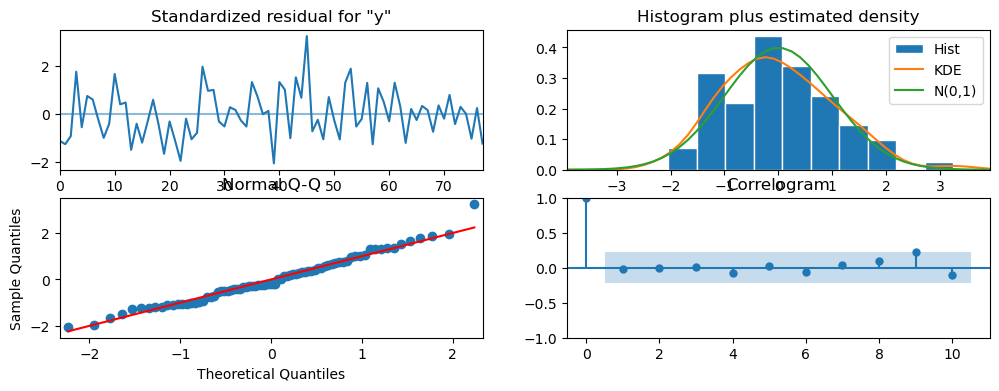

In [124]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [125]:
# Prediction rsme
predicted_auto_SARIMA = results_auto_SARIMA_6.forecast(steps=len(test))

rmse = mean_squared_error(test, predicted_auto_SARIMA.tolist(), squared=False)
print(rmse)

15.60324889878445


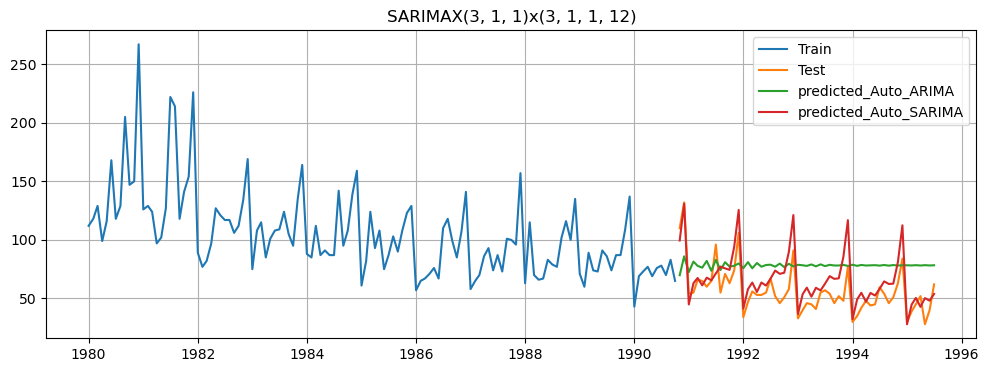

In [126]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
forecast_index = test.index
plt.plot(predicted_auto_ARIMA, label='predicted_Auto_ARIMA')
plt.plot(forecast_index,predicted_auto_SARIMA, label='predicted_Auto_SARIMA')

plt.legend(loc='best')
plt.grid()
plt.title('SARIMAX(3, 1, 1)x(3, 1, 1, 12)');

In [127]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,predicted_auto_SARIMA,squared=False)]}
                           ,index=['SARIMAX(3, 1, 1)x(3, 1, 1, 12)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,69.748996
SimpleAverageModel,52.009633
2pointTrailingMovingAverage,11.857432
4pointTrailingMovingAverage,15.416939
6pointTrailingMovingAverage,15.854979
9pointTrailingMovingAverage,16.402395
"Alpha=0.1,SES",29.827370
"Alpha=0.001,Beta=0.0001:DES",17.467106
"Alpha=0.09,Beta=0.00001,Gamma=0.0004:TES_ADD",13.848022
"Alpha=0.1,Beta=0.0007,Gamma=1.2e-05:TES_Mul",9.419222


In [140]:
resultsDf.sort_values(by='Test RMSE')

,Test RMSE
"Alpha=0.1,Beta=0.0007,Gamma=1.2e-05:TES_Mul",9.419222
2pointTrailingMovingAverage,11.857432
"SARIMAX(2, 1, 2)x(2, 1, 2, 12)",13.412014
"Alpha=0.09,Beta=0.00001,Gamma=0.0004:TES_ADD",13.848022
4pointTrailingMovingAverage,15.416939
"SARIMAX(3, 1, 1)x(3, 1, 1, 12)",15.603249
6pointTrailingMovingAverage,15.854979
9pointTrailingMovingAverage,16.402395
"Alpha=0.001,Beta=0.0001:DES",17.467106
"Auto_ARIMA (2,1,3)",29.184835


In [128]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [129]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [130]:
TES_train = df1.copy()

In [135]:
model_TES_tm_sm = ExponentialSmoothing(TES_train,trend='add',seasonal='multiplicative')
alpha=0.1
beta=0.0007
gamma=0.00012
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [136]:
future_predictions['Sales_Predictions']=prediction
future_predictions

,Sales_Predictions
1995-08-01,63.605384
1995-09-01,58.355542
1995-10-01,55.301686
1995-11-01,65.845267
1995-12-01,95.033362
1996-01-01,44.643815
1996-02-01,48.006940
1996-03-01,53.705957
1996-04-01,46.285980
1996-05-01,54.185234


In [137]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,30.369508,63.605384,96.841260
1995-09-01,25.119666,58.355542,91.591418
1995-10-01,22.065810,55.301686,88.537562
1995-11-01,32.609391,65.845267,99.081143
1995-12-01,61.797486,95.033362,128.269238


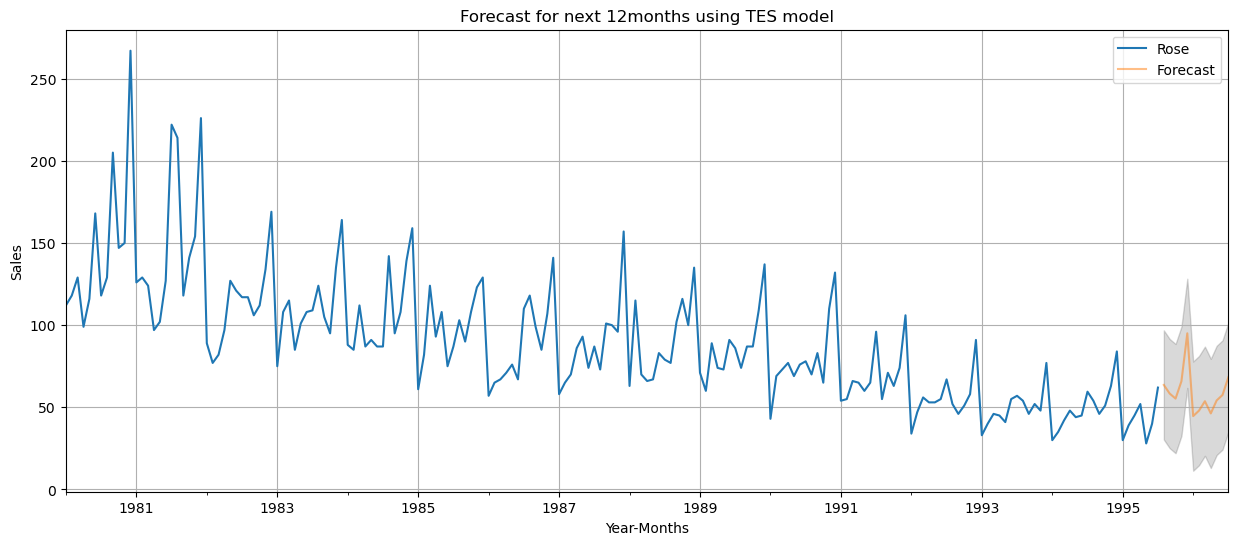

In [145]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Actual', figsize=(15,6))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title("Forecast for next 12months using TES model")
plt.grid()
plt.show()